<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Task_01_Supervised_Learning_Classification_SVM_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
from sklearn.svm import SVC
import cvxopt
from sklearn import datasets
from sklearn.metrics import classification_report
from numpy.random import default_rng
from numpy import linalg
import cvxopt.solvers

def train_test(X,Y,size):
  rng = default_rng()
  SizeTrain=int((size*X.shape[0]))
  random_np=rng.choice(X.shape[0], size=SizeTrain, replace=False)
  X_test=X[random_np,:]
  y_test=Y[random_np,]
  Y_train=np.delete(Y, random_np,axis=0)
  X_train=np.delete(X, random_np,axis=0)
  Y_train=Y_train.reshape(Y_train.shape[0],)
  y_test=y_test.reshape(y_test.shape[0],)
  return X_train,X_test,Y_train,y_test
def prepare_data_for_SVM(y_train,y_test):
    y_train[y_train==0] = -1
    y_test[y_test==0] = -1
    return y_train,y_test

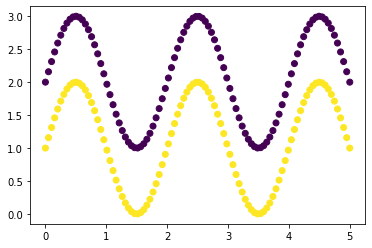

In [2]:
dataset = [[3.63636364e+00,1.09036800e+00,0], [4.09090909e+00,2.28173256e+00,0], [1.01010101e-01,1.31203345e+00,1], [4.54545455e-01,1.98982144e+00,1], [1.91919192e+00,1.74885201e+00,0], [1.76767677e+00,3.33230999e-01,1], [2.57575758e+00,2.97181157e+00,0], [1.06060606e+00,8.10748756e-01,1], [2.97979798e+00,1.06342392e+00,1], [1.86868687e+00,1.59906946e+00,0], [4.29292929e+00,2.79576184e+00,0], [4.39393939e+00,2.94500082e+00,0], [2.97979798e+00,2.06342392e+00,0], [2.37373737e+00,2.92235429e+00,0], [2.17171717e+00,1.51367739e+00,1], [2.67676768e+00,2.84972543e+00,0], [3.68686869e+00,1.67430145e-01,1], [5.05050505e-01,1.99987413e+00,1], [7.57575758e-01,2.69007901e+00,0], [1.46464646e+00,1.00616154e+00,0], [4.14141414e+00,2.42979491e+00,0], [1.71717172e+00,1.22385354e+00,0], [4.34343434e+00,1.88145336e+00,1], [3.53535354e-01,2.89599377e+00,0], [3.33333333e+00,1.33974596e-01,1], [1.46464646e+00,6.16153554e-03,1], [1.66666667e+00,1.33974596e-01,1], [4.74747475e+00,2.71269417e+00,0], [2.32323232e+00,1.84972543e+00,1], [4.14141414e+00,1.42979491e+00,1], [3.88888889e+00,1.65797986e+00,0], [1.51515152e-01,2.45822652e+00,0], [2.77777778e+00,2.64278761e+00,0], [1.21212121e+00,3.81841014e-01,1], [3.83838384e+00,5.13803264e-01,1], [3.68686869e+00,1.16743015e+00,0], [2.57575758e+00,1.97181157e+00,1], [4.09090909e+00,1.28173256e+00,1], [2.12121212e+00,1.37166246e+00,1], [3.18181818e+00,4.59359183e-01,1], [4.49494949e+00,1.99987413e+00,1], [1.31313131e+00,1.16743015e+00,0], [4.64646465e+00,2.89599377e+00,0], [2.52525253e+00,1.99685478e+00,1], [1.41414141e+00,3.61578414e-02,1], [3.23232323e+00,3.33230999e-01,1], [2.27272727e+00,1.75574957e+00,1], [2.17171717e+00,2.51367739e+00,0], [1.16161616e+00,5.13803264e-01,1], [2.82828283e+00,2.51367739e+00,0], [2.27272727e+00,2.75574957e+00,0], [3.33333333e+00,1.13397460e+00,0], [3.13131313e+00,1.59906946e+00,0], [2.02020202e+00,2.06342392e+00,0], [3.48484848e+00,1.13266082e-03,1], [5.05050505e-01,2.99987413e+00,0], [4.04040404e+00,1.12659245e+00,1], [3.78787879e+00,3.81841014e-01,1], [1.41414141e+00,1.03615784e+00,0], [1.26262626e+00,2.65408291e-01,1], [3.28282828e+00,2.23853536e-01,1], [4.69696970e+00,2.81457595e+00,0], [2.62626263e+00,1.92235429e+00,1], [1.71717172e+00,2.23853536e-01,1], [5.05050505e-02,2.15800140e+00,0], [3.03030303e+00,1.90494396e+00,0], [2.92929293e+00,1.22031053e+00,1], [7.57575758e-01,1.69007901e+00,1], [2.77777778e+00,1.64278761e+00,1], [1.11111111e+00,6.57979857e-01,1], [3.08080808e+00,1.74885201e+00,0], [2.87878788e+00,2.37166246e+00,0], [2.07070707e+00,1.22031053e+00,1], [2.52525253e-01,2.71269417e+00,0], [3.53535354e-01,1.89599377e+00,1], [2.02020202e+00,1.06342392e+00,1], [5.05050505e-02,1.15800140e+00,1], [3.58585859e+00,1.03615784e+00,0], [1.01010101e-01,2.31203345e+00,0], [0.00000000e+00,1.00000000e+00,1], [6.56565657e-01,1.88145336e+00,1], [4.24242424e+00,1.69007901e+00,1], [4.69696970e+00,1.81457595e+00,1], [9.09090909e-01,2.28173256e+00,0], [9.09090909e-01,1.28173256e+00,1], [4.54545455e+00,1.98982144e+00,1], [2.87878788e+00,1.37166246e+00,1], [3.38383838e+00,6.58521397e-02,1], [9.59595960e-01,2.12659245e+00,0], [7.07070707e-01,2.79576184e+00,0], [1.01010101e+00,9.68272067e-01,1], [2.12121212e+00,2.37166246e+00,0], [4.59595960e+00,1.95490224e+00,1], [1.61616162e+00,6.58521397e-02,1], [2.42424242e+00,2.97181157e+00,0], [5.00000000e+00,2.00000000e+00,0], [2.07070707e+00,2.22031053e+00,0], [3.53535354e+00,1.00616154e+00,0], [1.36363636e+00,1.09036800e+00,0], [4.44444444e+00,2.98480775e+00,0], [3.38383838e+00,1.06585214e+00,0], [4.04040404e-01,1.95490224e+00,1], [6.06060606e-01,2.94500082e+00,0], [1.86868687e+00,5.99069465e-01,1], [1.06060606e+00,1.81074876e+00,0], [4.94949495e+00,2.15800140e+00,0], [1.16161616e+00,1.51380326e+00,0], [8.58585859e-01,1.42979491e+00,1], [2.22222222e+00,2.64278761e+00,0], [2.22222222e+00,1.64278761e+00,1], [4.79797980e+00,1.59290793e+00,1], [2.82828283e+00,1.51367739e+00,1], [3.43434343e+00,1.02119755e+00,0], [4.54545455e+00,2.98982144e+00,0], [8.08080808e-01,2.56705986e+00,0], [2.37373737e+00,1.92235429e+00,1], [2.52525253e-01,1.71269417e+00,1], [3.48484848e+00,1.00113266e+00,0], [3.83838384e+00,1.51380326e+00,0], [4.89898990e+00,1.31203345e+00,1], [9.59595960e-01,1.12659245e+00,1], [4.94949495e+00,1.15800140e+00,1], [1.51515152e-01,1.45822652e+00,1], [4.04040404e+00,2.12659245e+00,0], [4.59595960e+00,2.95490224e+00,0], [1.56565657e+00,1.02119755e+00,0], [4.04040404e-01,2.95490224e+00,0], [1.96969697e+00,9.04943957e-01,1], [4.64646465e+00,1.89599377e+00,1], [8.58585859e-01,2.42979491e+00,0], [4.19191919e+00,1.56705986e+00,1], [3.18181818e+00,1.45935918e+00,0], [3.73737374e+00,1.26540829e+00,0], [2.02020202e-01,1.59290793e+00,1], [3.08080808e+00,7.48852013e-01,1], [3.88888889e+00,6.57979857e-01,1], [1.56565657e+00,2.11975538e-02,1], [4.89898990e+00,2.31203345e+00,0], [3.28282828e+00,1.22385354e+00,0], [3.73737374e+00,2.65408291e-01,1], [3.98989899e+00,9.68272067e-01,1], [2.42424242e+00,1.97181157e+00,1], [3.53535354e+00,6.16153554e-03,1], [2.47474747e+00,1.99685478e+00,1], [1.26262626e+00,1.26540829e+00,0], [0.00000000e+00,2.00000000e+00,0], [1.11111111e+00,1.65797986e+00,0], [1.01010101e+00,1.96827207e+00,0], [3.23232323e+00,1.33323100e+00,0], [1.51515152e+00,1.13266082e-03,1], [2.92929293e+00,2.22031053e+00,0], [2.32323232e+00,2.84972543e+00,0], [1.91919192e+00,7.48852013e-01,1], [2.72727273e+00,1.75574957e+00,1], [4.19191919e+00,2.56705986e+00,0], [6.56565657e-01,2.88145336e+00,0], [3.43434343e+00,2.11975538e-02,1], [1.81818182e+00,1.45935918e+00,0], [3.93939394e+00,8.10748756e-01,1], [3.93939394e+00,1.81074876e+00,0], [4.74747475e+00,1.71269417e+00,1], [3.58585859e+00,3.61578414e-02,1], [1.76767677e+00,1.33323100e+00,0], [3.98989899e+00,1.96827207e+00,0], [1.31313131e+00,1.67430145e-01,1], [5.00000000e+00,1.00000000e+00,1], [1.81818182e+00,4.59359183e-01,1], [1.36363636e+00,9.03680046e-02,1], [3.13131313e+00,5.99069465e-01,1], [2.47474747e+00,2.99685478e+00,0], [5.55555556e-01,1.98480775e+00,1], [4.24242424e+00,2.69007901e+00,0], [4.49494949e+00,2.99987413e+00,0], [4.34343434e+00,2.88145336e+00,0], [4.79797980e+00,2.59290793e+00,0], [1.66666667e+00,1.13397460e+00,0], [4.44444444e+00,1.98480775e+00,1], [1.61616162e+00,1.06585214e+00,0], [3.78787879e+00,1.38184101e+00,0], [4.54545455e-01,2.98982144e+00,0], [4.29292929e+00,1.79576184e+00,1], [2.67676768e+00,1.84972543e+00,1], [8.08080808e-01,1.56705986e+00,1], [3.03030303e-01,1.81457595e+00,1], [3.03030303e-01,2.81457595e+00,0], [1.96969697e+00,1.90494396e+00,0], [6.06060606e-01,1.94500082e+00,1], [3.63636364e+00,9.03680046e-02,1], [1.51515152e+00,1.00113266e+00,0], [1.21212121e+00,1.38184101e+00,0], [5.55555556e-01,2.98480775e+00,0], [4.84848485e+00,1.45822652e+00,1], [7.07070707e-01,1.79576184e+00,1], [2.52525253e+00,2.99685478e+00,0], [4.39393939e+00,1.94500082e+00,1], [2.72727273e+00,2.75574957e+00,0], [2.62626263e+00,2.92235429e+00,0], [4.84848485e+00,2.45822652e+00,0], [2.02020202e-01,2.59290793e+00,0], [3.03030303e+00,9.04943957e-01,1]]
data = np.array(dataset)

X_data= data[:,0:2]
y_data= data[:,2:]
data = np.array(dataset)
X_data= data[:,0:2]
y_data= data[:,2:]
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data)

In [3]:
X_train, X_test, y_train, y_test = train_test(X_data, y_data,0.2)
y_train,y_test = prepare_data_for_SVM(y_train,y_test)
print(X_train.shape)

(160, 2)


step of SVM
1. select Hard or Soft margin (In pur C for Soft)
2. select kernal (linear , polynomial and gaussian)


In [4]:
class SVM:
  def __init__(self,kernal='linear',p=2,sigma=0.9999,C = None,resolution=100):
    self.kernal=kernal
    self.p=p
    self.sigma=sigma
    self.C=C
    self.resolution = resolution
  def linear(self,x1,x2):
    return np.dot(x1 , x2)
  def polynomial (self,x,y):
    return (1 + np.dot(x,y)) ** self.p
  def gaussian(self,x,y):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (self.sigma ** 2)))
  
  def fit(self,X,y):
    m,n=X.shape
    #print('M {0}: N {1}'.format(m,n))
    K = np.zeros((m,m))
    for i in range (m):
      for j in range(m):
        if self.kernal == 'linear':
          K[i,j] = self.linear(X[i],X[j])

        if self.kernal == 'polynomial':
          K[i,j] = self.polynomial(X[i],X[j])
          
        if self.kernal ==  'gaussian':
          K[i,j] = self.gaussian(X[i],X[j])

        if self.kernal != 'linear' and self.kernal !='polynomial'and self.kernal !='gaussian':
            raise ValueError('kernal must be "linear" or "polynomial" or "gaussian"')

    P = cvxopt.matrix(np.outer(y,y) * K)
    q = cvxopt.matrix(np.ones(m) * -1)
    #A = cvxopt.matrix(y, (1,m),'d')
    A = cvxopt.matrix(y, (1,m))
    
    b = cvxopt.matrix(0.0) 
    if self.C is None:
      G = cvxopt.matrix(np.diag(np.ones(m) * -1))
      h = cvxopt.matrix(np.zeros(m)) 

    else:
      tmp1 = np.diag(np.ones(m) * -1)
      tmp2 = np.identity(m)
      G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
      tmp1 = np.zeros(m)
      tmp2 = np.ones(m) * self.C
      h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    a = np.ravel(solution['x'])
    
    
    sv_idx = a > 1e-5
    ind = np.arange(len(a))[sv_idx]
    a = a[sv_idx]    
    sv = X[sv_idx]
    sv_y = y[sv_idx]
    print("%d support vectors out of %d points" % (len(a), m))

    b = 0
    for k in range(len(a)):
        b += sv_y[n]
        b -= np.sum(a * sv_y * K[ind[n],sv_idx])
    b /= len(a)

    if self.kernal == 'linear':
            w = np.zeros(n)
            for k in range(len(a)):
                w += a[k] * sv_y[k] * sv[k]
    else:
        w = None
    return sv, sv_y, a, w, b
  def  project(self,X,sv, sv_y, a, w, b):
        if w is not None:
            return np.dot(X, w) + b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a_val, sv_y_val, sv_val in zip(a, sv_y, sv):
                    if self.kernal == 'polynomial':
                        s += a_val * sv_y_val * self.polynomial(X[i], sv_val)
                    else:
                        s += a_val * sv_y_val * self.gaussian(X[i], sv_val)
                y_predict[i] = s
            return y_predict + b

  def predict(self,X, sv, sv_y, a, w, b):
        return np.sign(self.project(X,sv, sv_y, a, w, b))
    
  def plot_contour(self,X1_train, X2_train, sv, sv_y, a, w, b):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(sv[:,0], sv[:,1], s=100, c="g")
        X1, X2 = np.meshgrid(np.linspace(-7,7,50), np.linspace(-7,7,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = self.project(X, kernel,sv, sv_y, a, w, b).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

  def mash_plot(self,X_train,y_train,Xdata,ydata):
     
    xmin=(np.min(X_train[:, 0]))-(np.max(X_train[:, 0])*0.1)
    xmax=(np.max(X_train[:, 0]))+(np.max(X_train[:, 0])*0.1)
    ymin=(np.min(X_train[:, 1]))-(np.max(X_train[:, 1])*0.1)
    ymax=(np.max(X_train[:, 1]))+(np.max(X_train[:, 1])*0.1)
    x_series = np.linspace(xmin,xmax,self.resolution)
    y_series = np.linspace(ymin,ymax,self.resolution)

    x_mesh,y_mesh = np.meshgrid(x_series,y_series)

    x_mesh = x_mesh.reshape(-1,1)
    y_mesh = y_mesh.reshape(-1,1)

    mesh = np.append(x_mesh,y_mesh,axis=1)
    y_pred = SVM.predict(mesh,sv,sv_y,a,w,b).astype(int)

    x_mesh = x_mesh.reshape(self.resolution,self.resolution)
    y_mesh = y_mesh.reshape(self.resolution,self.resolution)
    y_pred = y_pred.reshape(self.resolution,self.resolution)
    plt.figure(figsize=(10,10))
    plt.scatter(Xdata[:,0],Xdata[:,1],c=ydata)
    plt.pcolormesh(x_mesh,y_mesh,y_pred,cmap='viridis',shading='auto',alpha=0.1)
    plt.grid(True)
  def report_SVM(self,X_test,y_test,sv,sv_y,a,w,b):
    y_pred = self.predict(X_test,sv,sv_y,a,w,b).astype(int)
    print("y_test:",y_test.astype(int))
    print("y_pred:",y_pred)
    print(classification_report(y_test, y_pred))





In [5]:
SVM = SVM(kernal = 'gaussian',p=6,sigma=0.999999,C=None)

sv, sv_y, a, w, b = SVM.fit(X_train,y_train)

     pcost       dcost       gap    pres   dres
 0: -7.2537e+01 -2.0703e+02  5e+02  1e+01  2e+00
 1: -1.7320e+02 -3.2001e+02  2e+02  6e+00  1e+00
 2: -2.8078e+02 -3.9610e+02  1e+02  3e+00  4e-01
 3: -3.2559e+02 -4.1902e+02  1e+02  1e+00  2e-01
 4: -3.4482e+02 -3.6817e+02  2e+01  2e-01  3e-02
 5: -3.5219e+02 -3.6471e+02  1e+01  6e-02  1e-02
 6: -3.5772e+02 -3.6028e+02  3e+00  6e-03  1e-03
 7: -3.5914e+02 -3.5945e+02  3e-01  3e-04  4e-05
 8: -3.5922e+02 -3.5943e+02  2e-01  1e-04  2e-05
 9: -3.5937e+02 -3.5939e+02  2e-02  1e-05  2e-06
10: -3.5939e+02 -3.5939e+02  3e-04  1e-07  2e-08
11: -3.5939e+02 -3.5939e+02  3e-06  1e-09  2e-10
Optimal solution found.
21 support vectors out of 160 points


In [6]:
SVM.report_SVM(X_test,y_test,sv,sv_y,a,w,b)

y_test: [-1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1
  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1]
y_pred: [-1  1  1  1  1  1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1
  1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



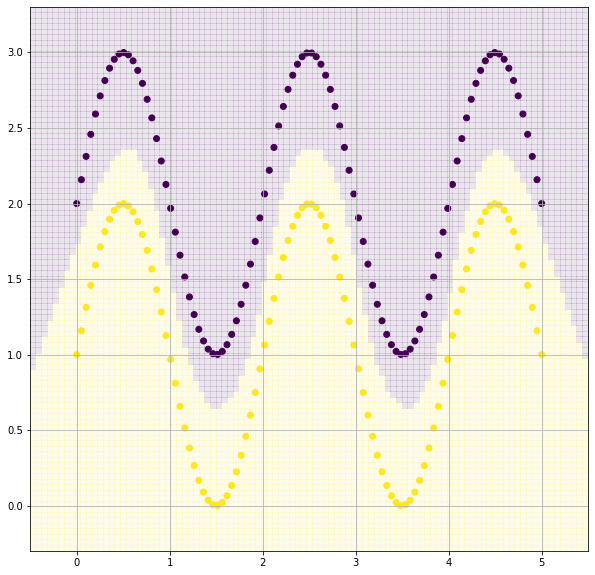

In [7]:
SVM.mash_plot(X_train,y_train,X_data,y_data)